In [2]:
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
# We are importing it because MNIST is a dataset which consists of a lot of handWritten digits

In [3]:
(train_img,train_labels),(test_img,test_labels) = tf.keras.datasets.mnist.load_data()
print(np.shape(train_img[0]))

(28, 28)


In [4]:
# Adding a grayscale layer to image
# to scale all values between 0 and 1 to fit in neural network
train_img =train_img.reshape((60000,28,28,1)).astype('float32')/255
test_img = test_img.reshape((10000,28,28,1)).astype('float32')/255

print(train_img[0])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

In [16]:
# This step is used to see images

# cv2.imshow("Image",train_img[1])
# cv2.waitKey(0)  # Wait for a key press to close the window
# cv2.destroyAllWindows()

In [6]:
def visualize_images(images, labels, num_images=25):
    plt.figure(figsize=(6, 6))
    # j = random.randint(0,60000-30)
    for i in range(num_images):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(f'Label: {labels[i]}')
        # or
        # plt.matshow(images[i])
    plt.show()

In [7]:

# Dataset is perfect
# visualize_images(train_img,train_labels)

# Simple Neural Network

In [8]:

train_flattened = train_img.reshape(len(train_img),28*28)
test_flattened = test_img.reshape(len(test_img),28*28)


model = tf.keras.Sequential([
    # # input layer sigmoid bc our input lies between 0 and 1
    tf.keras.layers.Dense(784,activation='sigmoid'),
    # output layer softmax bc we are predicting an output(class) from multiple outputs(class)
    tf.keras.layers.Dense(10,activation='softmax')
    # tf.keras.layers.Dense(10,input_shape = (784,),activation='sigmoid')

])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [10]:
# More epochs -> More time

history = model.fit(x=train_flattened , y=train_labels ,epochs=5, batch_size=32,verbose=0)

In [ ]:
test_results =model.evaluate(test_flattened,test_labels)

print(test_results)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - accuracy: 0.9773 - loss: 0.0843
[0.0700615793466568, 0.9817000031471252]


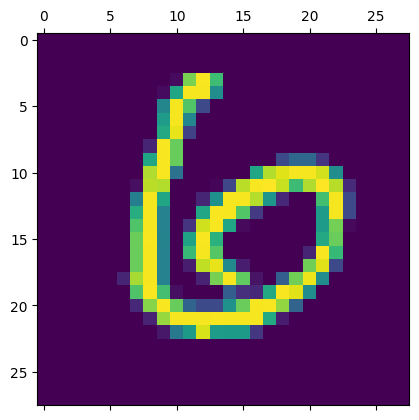

In [ ]:
plt.matshow(test_img[11])

In [ ]:
y_pred = model.predict(x=test_flattened)
# our output gives a numpy array of 10 neurons with prob we pick the highest one out of it as answer
print(np.argmax(y_pred[11]))


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step
6


# Image recognition using convolutional neural network